In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams

rcParams['figure.dpi']=150

In [2]:
#importamos los datos obtenidos en el laboratorio:
datos = np.loadtxt('datos_exp.txt', comments='%')

In [3]:
#Temperatura [K]
temperatura = datos[:,0]

#Viscosidad [mPa·s]
viscosidad = datos[:,2]

#Incertidumbre viscosidad
s_visco = 0.01 * viscosidad

#Densidad [Kg/m^3]
densidad = datos[:,1]

#Incertidumbre densidad
s_dens=5

## Densidad y viscosidad a presion atmosferica

In [4]:
#Calculo el logaritmo de la viscosidad
ln_visco = np.log(viscosidad)

#Y su incertidumbre
s_ln_visco = s_visco / viscosidad

In [5]:
viscosidad

array([367.68  , 250.86  , 176.35  , 127.    ,  93.599 ,  70.406 ,
        54.127 ,  42.248 ,  33.532 ,  27.03  ,  22.096 ,  18.297 ,
        15.325 ,  12.989 ,  11.113 ,   9.5924,   8.351 ,   7.3258,
         6.4694,   5.7524])

In [6]:
s_ln_visco

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

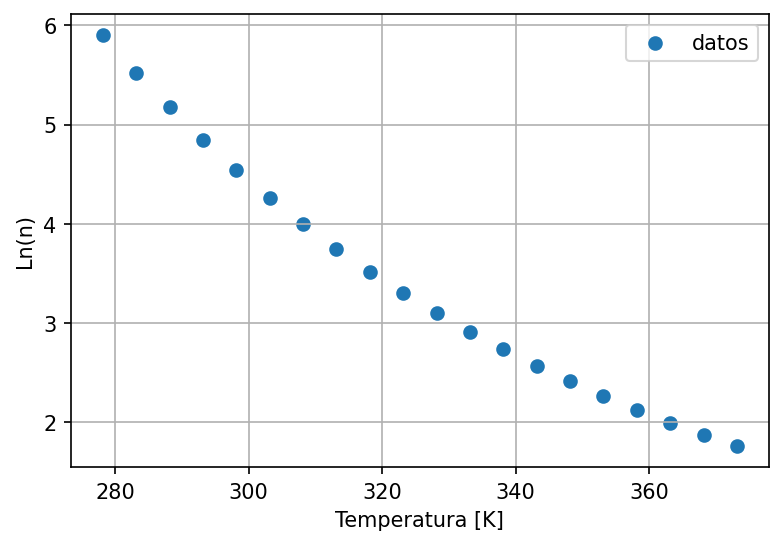

In [7]:
#Graficamos ln(visco) frente a la temperatura

plt.scatter(temperatura, ln_visco, label='datos')

plt.xlabel('Temperatura [K]')
plt.ylabel('Ln(n)')

plt.grid()

plt.legend()
plt.show()

In [8]:
#Realizamos  un ajuste a los datos:

def ecuacion_VFT(x,a,b,c):
    return a+ (b/(x-c))

In [9]:
popt, pcov = curve_fit(ecuacion_VFT, temperatura, ln_visco)
perr = np.sqrt(np.diag(pcov))

In [10]:
ajuste_1 = popt
print(ajuste_1)

[ -3.09822239 992.06643847 168.12143909]


In [11]:
err_ajuste_1 = perr
print(err_ajuste_1)

[ 0.04411664 13.18900871  0.96554976]


### Para el ajuste obtenemos los parametros:

$A=-3.098(44)$\
$B=992(13)[K]$\
$C=168.12(97)[K]$

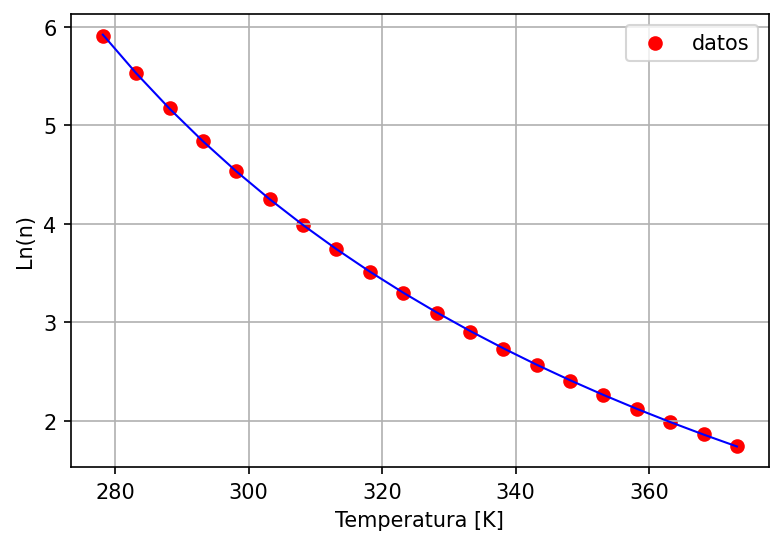

In [12]:
#Graficamos datos y ajuste:
plt.scatter(temperatura, ln_visco, c='r', label='datos')

plt.plot(temperatura, ecuacion_VFT(temperatura,*popt),
        'b',
        linewidth=1)

plt.xlabel('Temperatura [K]')
plt.ylabel('Ln(n)')

plt.grid()

plt.legend()
plt.show()

Pasamos ahora al calculo de las desviaciones de los datos

In [13]:
def AAD(x):
    return (1/len(x)) * sum(np.sqrt(x**2))
def Bias(x):
    return (1/len(x)) * sum(x)
def modulo_dev_i(x):
    return np.sqrt(x**2)
def DMax(x):
    return x.max()

In [14]:
# Variable Y_correlacionada

y_ln_viscosidad = ecuacion_VFT(temperatura,ajuste_1[0],ajuste_1[1],ajuste_1[2])


#Desviacion de la viscosidad
dev_i_1 =((ln_visco - y_ln_viscosidad) / ln_visco)*100

AAD_1 = AAD(dev_i_1)
Bias_1 = Bias(dev_i_1)
modulo_1 = modulo_dev_i(dev_i_1)
DMax_1 = DMax(modulo_1)
print(AAD_1)
print(Bias_1)
print(DMax_1)

0.1623880906397824
0.006186608811587779
0.523840369482969


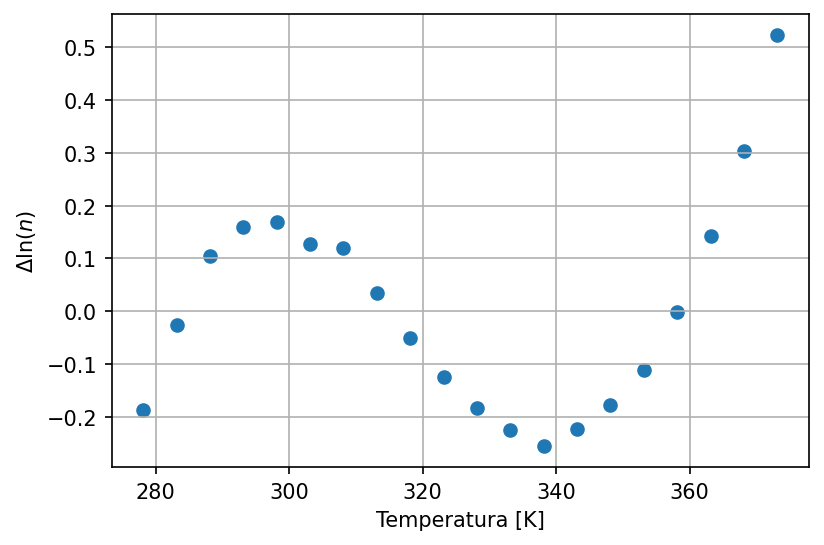

In [15]:
plt.scatter(temperatura, dev_i_1)
plt.xlabel('Temperatura [K]')
plt.ylabel('$\Delta$ln($n$)')
plt.grid()
plt.show()

### Con los parametros de desviación para:

$AAD = 0.16$%\
$Bias = 0.0062$%\
$DMax = 0.52$%

In [16]:
# calculemos la temperatura de transicion vitrea:

In [17]:
def temp_vitrea(x):
    return ( ajuste_1[2] + ( ajuste_1[1] / (np.log(x) - ajuste_1[0]) ))

In [18]:
# Para T_vitrea la viscosidad vale x=10^15 [mPa/s]:
T_vitrea = temp_vitrea(10**15)

In [19]:
T_vitrea

194.48024745737118

In [20]:
#Y su incertidumbre:
def incer_temp_vitrea(x):
    return np.sqrt(err_ajuste_1[2]**2 + (((ajuste_1[1] * err_ajuste_1[0])/((np.log(x)-ajuste_1[0])**2))**2) + ((err_ajuste_1[1]/(np.log(x)-ajuste_1[0]))**2))

In [21]:
s_T_vitrea = incer_temp_vitrea(10**15)

In [22]:
s_T_vitrea

1.0276379757553373

Obtenemos para la temperatura de transición vitrea:

$T_g=194.48(1.03)$

## Trabajemos ahora con los datos de densidad

In [23]:
# Empezaremos por representar y ajustar los datos de densidad frente
#a temperatura:

In [24]:
densidad

array([888. , 885. , 881.9, 878.9, 875.8, 872.8, 869.7, 866.7, 863.6,
       860.5, 857.4, 854.3, 851.2, 848.1, 845. , 841.8, 838.7, 835.6,
       832.4, 829.3])

In [25]:
s_dens

5

In [26]:
temperatura

array([278.15, 283.15, 288.15, 293.15, 298.15, 303.15, 308.15, 313.15,
       318.15, 323.15, 328.15, 333.15, 338.15, 343.15, 348.15, 353.15,
       358.15, 363.15, 368.15, 373.15])

In [27]:
# El logaritmo de la densidad y su incertidumbre:
ln_densidad = np.log(densidad)
s_ln_dens = s_dens / densidad

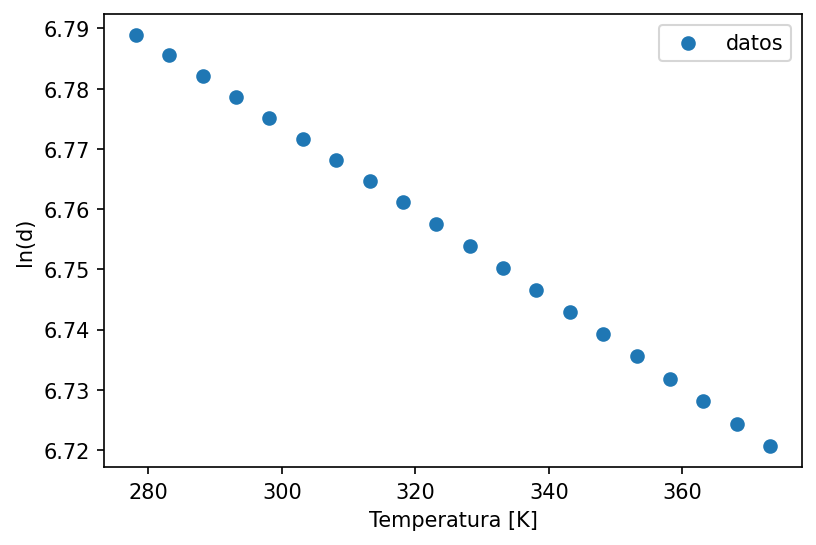

In [28]:
# Grafiquemos el logaritmo de la densidad frente a T:
plt.scatter(temperatura,ln_densidad, label='datos')

plt.xlabel('Temperatura [K]')
plt.ylabel('ln(d)')
plt.legend()
plt.show()

In [29]:
# Hagamos ahora un ajuste por isobaras:

In [30]:
def ec_isobaras(x,a,b,c,d):
    return a+ b*x + c*(x**2) + d*(x**3)

In [31]:
popt, pcov = curve_fit(ec_isobaras, temperatura, ln_densidad)
perr = np.sqrt(np.diag(pcov))

In [32]:
popt

array([ 6.95191981e+00, -5.05513091e-04, -2.35863302e-07, -1.90377774e-10])

In [33]:
ajuste_2 = popt
print(ajuste_2)

[ 6.95191981e+00 -5.05513091e-04 -2.35863302e-07 -1.90377774e-10]


In [34]:
err_ajuste_2 = perr
print(err_ajuste_2)

[1.34973725e-02 1.25312903e-04 3.86233256e-07 3.95217563e-10]


### Para el ajuste obtenemos los parametros:

$A= 6.95(1)$\
$B= -5.06(1.25)·10^{-4}[K^{-1}]$\
$C= -2.36(3.86)·10^{-7}[K^{-2}]$\
$D= -1.90(3.95)·10^{-10}[K^{-3}]$

In [35]:
#Grafiquemos

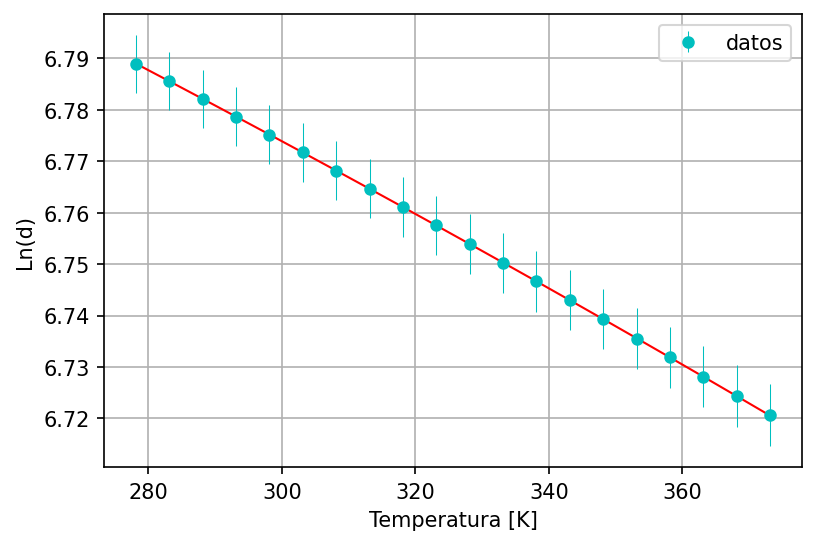

In [36]:
plt.errorbar(temperatura, ln_densidad,s_ln_dens,
             fmt='.',
             elinewidth=0.5,
             markersize=10,
             c='c',
             label='datos')

plt.plot(temperatura, ec_isobaras(temperatura,*popt),
        'r',
        linewidth=1)

plt.xlabel('Temperatura [K]')
plt.ylabel('Ln(d)')

plt.grid()

plt.legend()
plt.show()

# Desviaciones otra vez

In [37]:
# Variable y_correlacionada:

y_ln_densidad = ec_isobaras(temperatura, ajuste_2[0], ajuste_2[1], ajuste_2[2], ajuste_2[3])

#Desviacion de la densidad
dev_i_2 =((ln_densidad - y_ln_densidad) / ln_densidad)*100

AAD_2 = AAD(dev_i_2)
Bias_2 = Bias(dev_i_2)
modulo_2 = modulo_dev_i(dev_i_2)
DMax_2 = DMax(modulo_2)
print(AAD_2)
print(Bias_2)
print(DMax_2)

0.0003597586128223144
-1.8433111723662649e-09
0.0008152099402585674


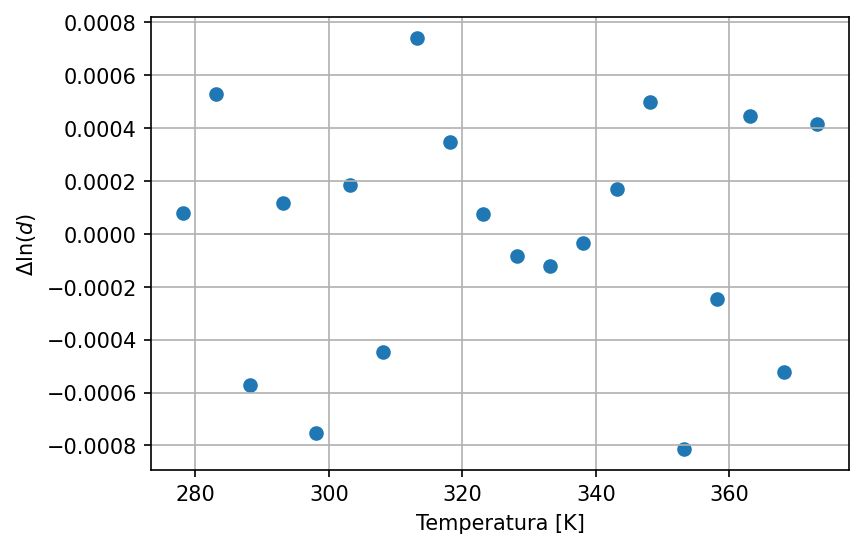

In [38]:
plt.scatter(temperatura, dev_i_2)
plt.xlabel('Temperatura [K]')
plt.ylabel('$\Delta$ln($d$)')
plt.grid()
plt.show()

### Con los parametros de desviación:

$AAD = 0.00036$%\
$Bias = -1.84·10^{-9}$%\
$DMax = 0.00081$%

## Calculemos ahora el coeficiente de expansión térmica y representemos su dependencia con T:

In [39]:
# Definimos el coeficiente de expansion termica(alpha_p) como:
def alpha(x,a,b,c):
    return -a - 2*b*x - 3*c*(x**2)

In [40]:
# y su incertidumbre
def s_alpha(x,a,b,c):
    return np.sqrt( a**2 + 4*(x**2)*(b**2) + 9*(x**4)*(c**2)        )

In [41]:
alpha_p = alpha(temperatura,ajuste_2[1],ajuste_2[2],ajuste_2[3])
s_alpha_p = s_alpha(temperatura,err_ajuste_2[1],err_ajuste_2[2],err_ajuste_2[3])
print(alpha_p)
print(s_alpha_p)

[0.00068091 0.00068487 0.00068886 0.00069288 0.00069693 0.000701
 0.00070511 0.00070924 0.0007134  0.00071759 0.00072181 0.00072606
 0.00073033 0.00073464 0.00073897 0.00074333 0.00074772 0.00075214
 0.00075659 0.00076106]
[0.00026511 0.00026941 0.00027375 0.00027814 0.00028259 0.00028708
 0.00029162 0.0002962  0.00030084 0.00030552 0.00031026 0.00031504
 0.00031987 0.00032474 0.00032967 0.00033464 0.00033967 0.00034474
 0.00034986 0.00035503]


### Grafiquemos los valores obtenidos frente a la temperatura :

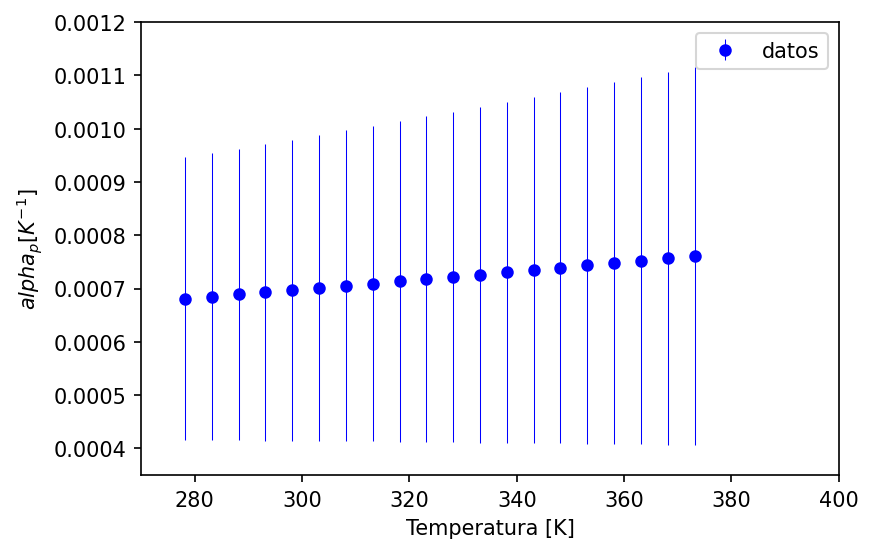

In [42]:
plt.errorbar(temperatura, alpha_p,s_alpha_p,
             fmt='.',
             elinewidth=0.5,
             markersize=10,
             c='b',
             label='datos')
plt.xlabel('Temperatura [K]')
plt.xlim(270,400)
plt.ylim(0.00035,0.0012)
plt.ylabel('$alpha_p$[$K^{-1}$]')
plt.legend()
plt.show()

## Densidad a alta presion

In [43]:
#Datos para T=315.15[K]
datos_T_315 = np.loadtxt('datos_T_315.txt', comments='%')

In [44]:
densidad_315 = datos_T_315[:,2]
s_densidad_315 = datos_T_315[:,3]

In [45]:
#Datos para T=353.15[K]
datos_T_353 = np.loadtxt('datos_T_353.txt', comments= '%')

In [46]:
densidad_353 = datos_T_353[:,2]
s_densidad_353 = datos_T_353[:,3]

In [47]:
presion = datos_T_315[:,0]
s_presion = datos_T_315[:,1]

# Isotermas

In [48]:
#La densidad atmosferica dens_atm=1.225

In [49]:
#Representaremos la variacion de la densidad con la presion para cada T y
#asjutaremos a una ecuacion tipo Tammann-Tait

In [50]:
def TT(x,a,b, bounds=(0.1,[1,500]) ):
    return (1.225/( 1 - a * (np.log(b + x)-np.log(b + 0.1)))   )

### Duda ajuste Ecuacion TT

# Isobaras

In [51]:
#Datos de temperatura y densidad para dos presiones fijas:
datos_P_20 = np.loadtxt('datos_P_20.txt', comments='%')
datos_P_80 = np.loadtxt('datos_P_80.txt', comments='%')

In [52]:
temperatura_p = datos_P_20[:,0]
s_temp_p = datos_P_20[:,1]
densidad_p_20 = datos_P_20[:,2]
densidad_p_80 = datos_P_80[:,2]
s_dens_p = datos_P_20[:,3]

In [53]:
#Ajuste por isobaras:
def isob(x,a,b,c,d):
    return a + b*x + c*(x**2) + d*(x**3)

In [54]:
# el logaritmo de la densidad:
ln_dens_p_20= np.log(densidad_p_20)
ln_dens_p_80 = np.log(densidad_p_80)

In [55]:
# Para P=20 [MPa]

In [56]:
popt, pcov = curve_fit(isob, temperatura_p, ln_dens_p_20)
perr = np.sqrt(np.diag(pcov))

In [57]:
ajuste_4 = popt
err_ajuste_4 = perr
print(ajuste_4)
print(err_ajuste_4)

[ 7.15466021e+00 -2.14684546e-03  4.31475827e-06 -4.17725363e-09]
[4.45311901e-02 3.99014355e-04 1.18340897e-06 1.16197313e-09]


### Para el ajuste de $P=20 [MPa]$  obtenemos los parametros:

$A= 7.15(4)$\
$B= -2.14(4)·10^{-3}[K^{-1}]$\
$C= 4.31(1.18)·10^{-6}[K^{-2}]$\
$D= -4.18(1.16)·10^{-9}[K^{-3}]$

In [58]:
# Para P=80 [MPa]

In [59]:
popt, pcov = curve_fit(isob, temperatura_p, ln_dens_p_80)
perr = np.sqrt(np.diag(pcov))

In [60]:
ajuste_5 = popt
err_ajuste_5 = perr
print(ajuste_5)
print(err_ajuste_5)

[ 7.09065689e+00 -1.47294679e-03  2.51263130e-06 -2.23664282e-09]
[5.22781793e-02 4.68431538e-04 1.38929287e-06 1.36413133e-09]


### Para el ajuste de $P=80 [MPa]$  obtenemos los parametros:

$A= 7.09(5)$\
$B= -1.47(47)·10^{-3}[K^{-1}]$\
$C= 2.51(1.39)·10^{-6}[K^{-2}]$\
$D= -2.34(1.36)·10^{-9}[K^{-3}]$

In [61]:
#Representemos los dos ajustes:

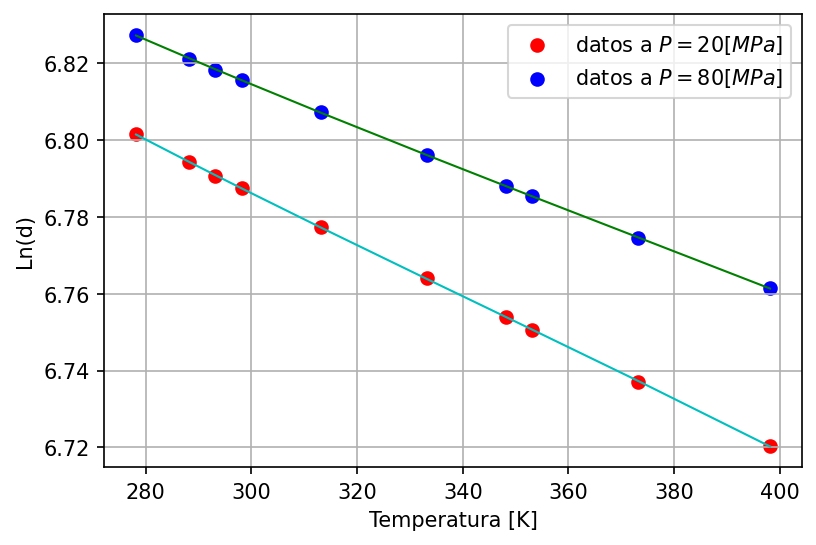

In [62]:
plt.scatter(temperatura_p, ln_dens_p_20, c='r', label='datos a $P=20[MPa]$')
plt.scatter(temperatura_p, ln_dens_p_80, c='b', label='datos a $P=80[MPa]$')



plt.plot(temperatura_p, isob(temperatura_p,*ajuste_4),
        'c',
        linewidth=1)
plt.plot(temperatura_p, isob(temperatura_p,*ajuste_5),
        'g',
        linewidth=1)



plt.xlabel('Temperatura [K]')
plt.ylabel('Ln(d)')

plt.grid()

plt.legend()
plt.show()

### Graficas de desviaciones y parametros de desviacion:

In [63]:
#Para P=20[MPa]

In [64]:
# Variable Y_correlacionada

y_ln_dens_p20 = isob(temperatura_p,ajuste_4[0],ajuste_4[1],ajuste_4[2],ajuste_4[3])

#Desviacion
dev_i_5 =((ln_dens_p_20 - y_ln_dens_p20) / ln_dens_p_20)*100

AAD_5 = AAD(dev_i_5)
Bias_5 = Bias(dev_i_5)
modulo_5 = modulo_dev_i(dev_i_5)
DMax_5 = DMax(modulo_5)
print(AAD_5)
print(Bias_5)
print(DMax_5)

0.001363660542930998
-2.8030698850966315e-08
0.0026174737841049545


### Con los parametros de desviación para  $P=20[MPa]$:

$AAD = 0.0014$%\
$Bias = -2.8·10^{-8}$%\
$DMax = 0.0026$%

In [65]:
#Para P=80[MPa]

In [66]:
# Variable Y_correlacionada

y_ln_dens_p80 = isob(temperatura_p,ajuste_5[0],ajuste_5[1],ajuste_5[2],ajuste_5[3])

#Desviacion
dev_i_6 =((ln_dens_p_80 - y_ln_dens_p80) / ln_dens_p_80)*100

AAD_6 = AAD(dev_i_6)
Bias_6 = Bias(dev_i_6)
modulo_6 = modulo_dev_i(dev_i_6)
DMax_6 = DMax(modulo_6)
print(AAD_6)
print(Bias_6)
print(DMax_6)

0.0016320409952227694
-3.848525485583088e-08
0.0032482650688472423


### Con los parametros de desviación para  $P=80[MPa]$:

$AAD = 0.0016$%\
$Bias = -3.85·10^{-8}$%\
$DMax = 0.0032$%

## Grafiquemos ambas desviaciones para isobaras:

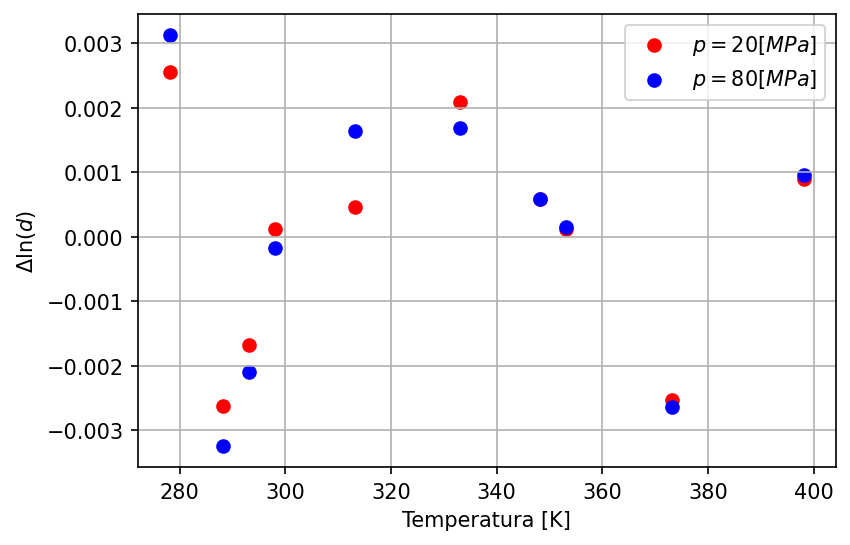

In [67]:
plt.scatter(temperatura_p, dev_i_5, c='r', label='$p=20[MPa]$')

plt.scatter(temperatura_p, dev_i_6, c='b', label='$p=80[MPa]$')

plt.xlabel('Temperatura [K]')
plt.ylabel('$\Delta$ln($d$)')
plt.grid()
plt.legend()
plt.show()

# COMPRESIBILIDAD ISOTERMA--FALTA CALCULO ISOTERMAS

## Calculemos a partir de los ajustes de las isobaras el coeficiente de expansion termica:

In [68]:
alpha_p20 = alpha(temperatura_p,ajuste_4[1],ajuste_4[2],ajuste_4[3])
s_alpha_p20 = s_alpha(temperatura_p,err_ajuste_4[1],err_ajuste_4[2],err_ajuste_4[3])


alpha_p80 = alpha(temperatura_p,ajuste_5[1],ajuste_5[2],ajuste_5[3])
s_alpha_p80 = s_alpha(temperatura_p,err_ajuste_5[1],err_ajuste_5[2],err_ajuste_5[3])

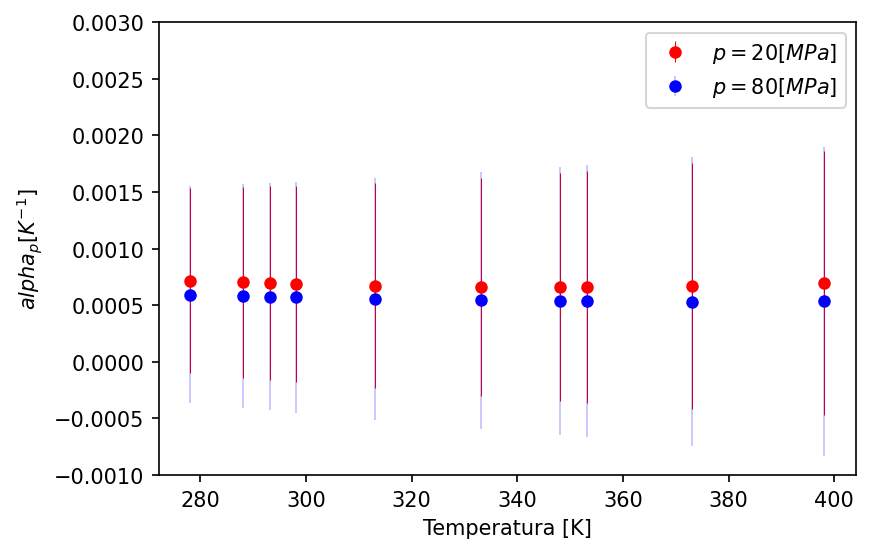

In [69]:
plt.errorbar(temperatura_p, alpha_p20,s_alpha_p20,
             fmt='.',
             elinewidth=0.5,
             markersize=10,
             c='r',             
             label='$p=20[MPa]$')
plt.errorbar(temperatura_p, alpha_p80,s_alpha_p80,
             fmt='.',
             elinewidth=0.2,
             markersize=10,
             c='b',
             label='$p=80[MPa]$')

plt.xlabel('Temperatura [K]')
plt.ylim(-0.001,0.0030)
plt.ylabel('$alpha_p$[$K^{-1}$]')
plt.legend()
plt.show()

# Conductividad térmica

In [70]:
# Cargamos datos de conductividad termica:
datos_conduc = np.loadtxt('datos_conductividad.txt', comments='%')
conductividad = datos_conduc[:,0]
s_conduc = datos_conduc[:,1]

In [71]:
media_conductividad = np.mean(conductividad)
desv_t_conduct = np.std(conductividad)
print(media_conductividad)
print(desv_t_conduct)

0.12833499999999998
0.0006467418341193033


In [72]:
media_conductividad + 2* desv_t_conduct

0.1296284836682386

In [73]:
media_conductividad - 2* desv_t_conduct

0.12704151633176136

Intervalo de confianza:

$0.127\leq \sigma \leq 0.1296$

In [74]:
conductividad.max()

0.1297

In [75]:
conductividad.min()

0.127

In [76]:
conductividad

array([0.1283, 0.1283, 0.1283, 0.1283, 0.1286, 0.1286, 0.1273, 0.128 ,
       0.1289, 0.1282, 0.1295, 0.129 , 0.1282, 0.1275, 0.1277, 0.127 ,
       0.1287, 0.1297, 0.1283, 0.1283])

In [77]:
#Excluiremos un unico dato por no entrar en el intervalo de confianza,
#quedandonos para la conductividad termica:

In [78]:
conductividad_corr = np.delete(conductividad, 17)

In [79]:
s_conductividad_corr = np.delete(s_conduc, 17)

In [80]:
media_conductividad_corr = np.mean(conductividad_corr)
desv_t_conduct_corr = np.std(conductividad_corr)
print(media_conductividad_corr)
print(desv_t_conduct_corr)

0.1282631578947368
0.0005805718835005328


In [81]:
#la incertidumbre será la combinada
s_sigma = np.sqrt((0.01* media_conductividad_corr**2)+ desv_t_conduct_corr**2)
print(s_sigma)

0.012839448603550433


La conductividad térmica obtenida será:

$\sigma = 0.128(13)[\frac{W}{mK}]$

## Ensayo de friccion y desgaste:

In [82]:
#cargamos los datos de las 8 tomas:
exp_1 = np.loadtxt('exp_1.txt', comments='%')
exp_2 = np.loadtxt('exp_2.txt', comments='%')
exp_3 = np.loadtxt('exp_3.txt', comments='%')
exp_4 = np.loadtxt('exp_4.txt', comments='%')
exp_5 = np.loadtxt('exp_5.txt', comments='%')
exp_6 = np.loadtxt('exp_6.txt', comments='%')
exp_7 = np.loadtxt('exp_7.txt', comments='%')
exp_8 = np.loadtxt('exp_8.txt', comments='%')
exp_1_t = np.loadtxt('exp_1_t.txt', comments='%')
exp_2_t = np.loadtxt('exp_2_t.txt', comments='%')
exp_3_t = np.loadtxt('exp_3_t.txt', comments='%')
exp_4_t = np.loadtxt('exp_4_t.txt', comments='%')
exp_5_t = np.loadtxt('exp_5_t.txt', comments='%')
exp_6_t = np.loadtxt('exp_6_t.txt', comments='%')
exp_7_t = np.loadtxt('exp_7_t.txt', comments='%')
exp_8_t = np.loadtxt('exp_8_t.txt', comments='%')

In [141]:
coef_1_total = exp_1[:,1]
coef_2_total = exp_2[:,1]
coef_3_total = exp_3[:,1]
coef_4_total = exp_4[:,1]
coef_5_total = exp_5[:,1]
coef_6_total = exp_6[:,1]
coef_7_total = exp_7[:,1]
coef_8_total = exp_8[:,1]

tiempo_1_total = exp_1[:,0]
tiempo_2_total = exp_2[:,0]
tiempo_3_total = exp_3[:,0]
tiempo_4_total = exp_4[:,0]
tiempo_5_total = exp_5[:,0]
tiempo_6_total = exp_6[:,0]
tiempo_7_total = exp_7[:,0]
tiempo_8_total = exp_8[:,0]

coef_1 = exp_1_t[:,1]
coef_2 = exp_2_t[:,1]
coef_3 = exp_3_t[:,1]
coef_4 = exp_4_t[:,1]
coef_5 = exp_5_t[:,1]
coef_6 = exp_6_t[:,1]
coef_7 = exp_7_t[:,1]
coef_8 = exp_8_t[:,1]

tiempo_1 = exp_1_t[:,0]
tiempo_2 = exp_2_t[:,0]
tiempo_3 = exp_3_t[:,0]
tiempo_4 = exp_4_t[:,0]
tiempo_5 = exp_5_t[:,0]
tiempo_6 = exp_6_t[:,0]
tiempo_7 = exp_7_t[:,0]
tiempo_8 = exp_8_t[:,0]

In [84]:
#Calculo la media del coeficiente de friccion para cada toma:
media_coeficiente_1 = np.mean(coef_1)
media_coeficiente_2 = np.mean(coef_2)
media_coeficiente_3 = np.mean(coef_3)
media_coeficiente_4 = np.mean(coef_4)
media_coeficiente_5 = np.mean(coef_5)
media_coeficiente_6 = np.mean(coef_6)
media_coeficiente_7 = np.mean(coef_7)
media_coeficiente_8 = np.mean(coef_8)


desv_coef_1 = np.std(coef_1)
desv_coef_2 = np.std(coef_2)
desv_coef_3 = np.std(coef_3)
desv_coef_4 = np.std(coef_4)
desv_coef_5 = np.std(coef_5)
desv_coef_6 = np.std(coef_6)
desv_coef_7 = np.std(coef_7)
desv_coef_8 = np.std(coef_8)



print(media_coeficiente_1)
print(media_coeficiente_2)
print(media_coeficiente_3)
print(media_coeficiente_4)
print(media_coeficiente_5)
print(media_coeficiente_6)
print(media_coeficiente_7)
print(media_coeficiente_8)

print(desv_coef_1)
print(desv_coef_2)
print(desv_coef_3)
print(desv_coef_4)
print(desv_coef_5)
print(desv_coef_6)
print(desv_coef_7)
print(desv_coef_8)

0.07881688565145685
0.06081726072607261
0.0630834405940594
0.0924263898817707
0.07492417651910915
0.0668239609675646
0.05141458791208791
0.04189001648804617
0.0025593771691167985
0.0033028236210121582
0.002762037603141638
0.004389044748273841
0.004723140980905459
0.0047256186398171975
0.001722865583611949
0.0024296033101826376


## Grafiquemos los datos de las 8 tomas:

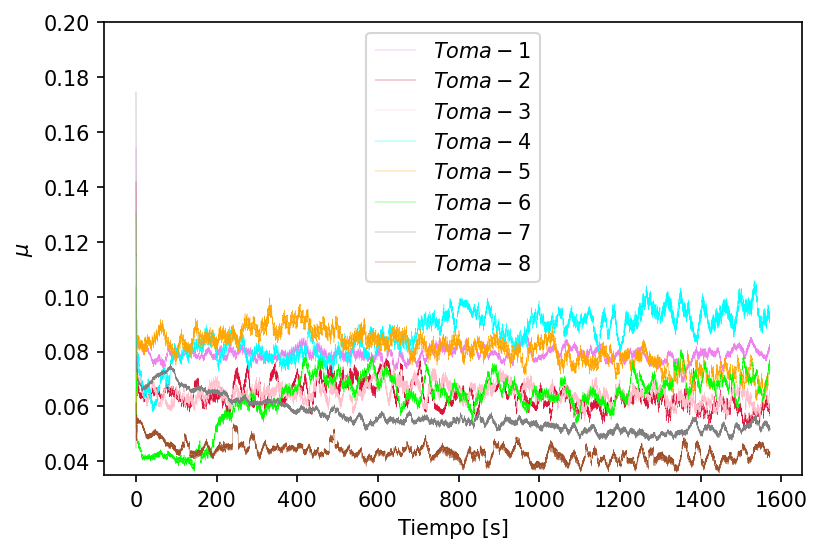

In [150]:
plt.plot(tiempo_1_total, coef_1_total,linewidth=0.2, c='violet', label='$Toma-1$')

plt.plot(tiempo_2_total, coef_2_total,linewidth=0.2, c='crimson', label='$Toma-2$')

plt.plot(tiempo_3_total, coef_3_total,linewidth=0.2, c='pink', label='$Toma-3$')

plt.plot(tiempo_4_total, coef_4_total,linewidth=0.2, c='cyan', label='$Toma-4$')

plt.plot(tiempo_5_total, coef_5_total,linewidth=0.2, c='orange', label='$Toma-5$')

plt.plot(tiempo_6_total, coef_6_total,linewidth=0.2, c='lime', label='$Toma-6$')

plt.plot(tiempo_7_total, coef_7_total,linewidth=0.2, c='grey', label='$Toma-7$')

plt.plot(tiempo_8_total, coef_8_total,linewidth=0.2, c='sienna', label='$Toma-8$')


plt.xlabel('Tiempo [s]')
plt.ylabel('$\mu$')
plt.ylim(0.035,0.2)
plt.legend()
plt.show()

In [151]:
# Graficamos ahora la evolucion temporal del coeficiente de friccion para
#los datos a partir del tiempo de estabilidad:

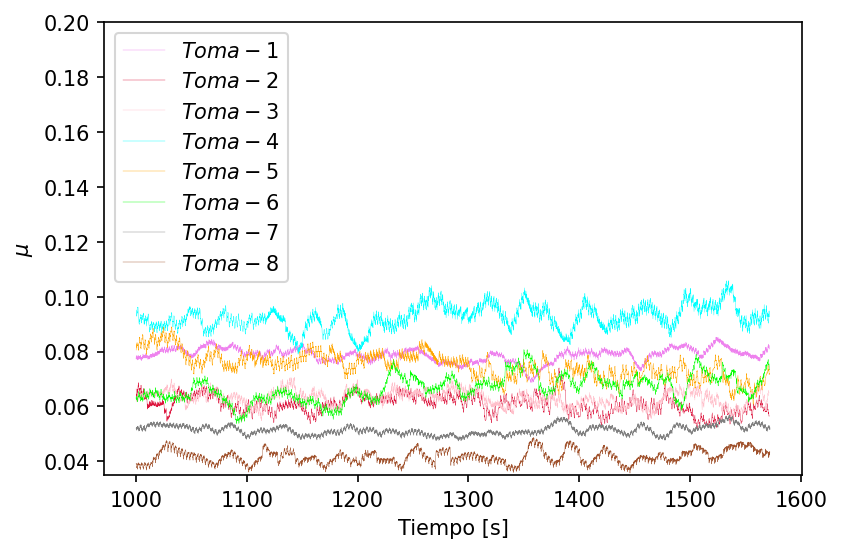

In [152]:
plt.plot(tiempo_1, coef_1,linewidth=0.2, c='violet', label='$Toma-1$')

plt.plot(tiempo_2, coef_2,linewidth=0.2, c='crimson', label='$Toma-2$')

plt.plot(tiempo_3, coef_3,linewidth=0.2, c='pink', label='$Toma-3$')

plt.plot(tiempo_4, coef_4,linewidth=0.2, c='cyan', label='$Toma-4$')

plt.plot(tiempo_5, coef_5,linewidth=0.2, c='orange', label='$Toma-5$')

plt.plot(tiempo_6, coef_6,linewidth=0.2, c='lime', label='$Toma-6$')

plt.plot(tiempo_7, coef_7,linewidth=0.2, c='grey', label='$Toma-7$')

plt.plot(tiempo_8, coef_8,linewidth=0.2, c='sienna', label='$Toma-8$')


plt.xlabel('Tiempo [s]')
plt.ylabel('$\mu$')
plt.ylim(0.035,0.2)
plt.legend()
plt.show()

### Calcular intervalos de confianza

In [87]:
#Intervalos de confianza para cada una de las tomas:

Toma 1:

In [106]:
media_coeficiente_1 + 2 * desv_coef_1

0.08393563998969045

In [90]:
media_coeficiente_1 - 2 * desv_coef_1

0.07369813131322325

$0.074\leq \mu \leq 0.084$

In [111]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_1=(coef_1>=0.074)
int_1=coef_1[b_m_1]
a_m_1=(int_1<=0.084)
media_coeficiente_1_corr = int_1[a_m_1]

media_coeficiente_1_corregida = np.mean(media_coeficiente_1_corr)
desv_coef_1_corr = np.std(media_coeficiente_1_corr)

print(media_coeficiente_1_corregida)
print(desv_coef_1_corr)

0.07905032583621684
0.0021190673975757805


Toma 2:

In [107]:
media_coeficiente_2 + 2 * desv_coef_2

0.06742290796809693

$0.054\leq \mu \leq 0.067$

In [113]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_2=(coef_2>=0.054)
int_2=coef_2[b_m_2]
a_m_2=(int_2<=0.067)
media_coeficiente_2_corr = int_2[a_m_2]

media_coeficiente_2_corregida = np.mean(media_coeficiente_2_corr)
desv_coef_2_corr = np.std(media_coeficiente_2_corr)

print(media_coeficiente_2_corregida)
print(desv_coef_2_corr)

0.060775325308111215
0.0029451599565895117


Toma 3:

In [93]:
media_coeficiente_3 + 2 * desv_coef_3

0.06860751580034267

In [94]:
media_coeficiente_3 - 2 * desv_coef_3

0.057559365387776125

$0.058\leq \mu \leq 0.067$

In [114]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_3=(coef_3>=0.058)
int_3=coef_3[b_m_3]
a_m_3=(int_3<=0.067)
media_coeficiente_3_corr = int_3[a_m_3]

media_coeficiente_3_corregida = np.mean(media_coeficiente_3_corr)
desv_coef_3_corr = np.std(media_coeficiente_3_corr)

print(media_coeficiente_3_corregida)
print(desv_coef_3_corr)

0.06292746336996337
0.0023169946285767694


Toma 4:

In [95]:
media_coeficiente_4 + 2 * desv_coef_4

0.10120447937831838

In [96]:
media_coeficiente_4 - 2 * desv_coef_4

0.08364830038522302

$0.084\leq \mu \leq 0.101$

In [115]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_4=(coef_4>=0.084)
int_4=coef_4[b_m_4]
a_m_4=(int_4<=0.101)
media_coeficiente_4_corr = int_4[a_m_4]

media_coeficiente_4_corregida = np.mean(media_coeficiente_4_corr)
desv_coef_4_corr = np.std(media_coeficiente_4_corr)

print(media_coeficiente_4_corregida)
print(desv_coef_4_corr)

0.09254929473993535
0.003670287665946773


Toma 5:

In [97]:
media_coeficiente_5 + 2 * desv_coef_5

0.08437045848092008

In [98]:
media_coeficiente_5 - 2 * desv_coef_5

0.06547789455729823

$0.065\leq \mu \leq 0.084$

In [117]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_5=(coef_5>=0.065)
int_5=coef_5[b_m_5]
a_m_5=(int_5<=0.084)
media_coeficiente_5_corr = int_5[a_m_5]

media_coeficiente_5_corregida = np.mean(media_coeficiente_5_corr)
desv_coef_5_corr = np.std(media_coeficiente_5_corr)

print(media_coeficiente_5_corregida)
print(desv_coef_5_corr)

0.07467713749277874
0.004157608740237786


Toma 6:

In [99]:
media_coeficiente_6 + 2 * desv_coef_6

0.076275198247199

In [100]:
media_coeficiente_6 - 2 * desv_coef_6

0.057372723687930206

$0.057\leq \mu \leq 0.076$

In [124]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_6=(coef_6>=0.057)
int_6=coef_6[b_m_6]
a_m_6=(int_6<=0.076)
media_coeficiente_6_corr = int_6[a_m_6]

media_coeficiente_6_corregida = np.mean(media_coeficiente_6_corr)
desv_coef_6_corr = np.std(media_coeficiente_6_corr)

print(media_coeficiente_6_corregida)
print(desv_coef_6_corr)

0.06675511742534068
0.004119480243524451


Toma 7:

In [101]:
media_coeficiente_7 + 2 * desv_coef_7

0.054860319079311805

In [102]:
media_coeficiente_7 - 2 * desv_coef_7

0.047968856744864015

$0.048\leq \mu \leq 0.055$

In [125]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_7=(coef_7>=0.048)
int_7=coef_7[b_m_7]
a_m_7=(int_7<=0.055)
media_coeficiente_7_corr = int_7[a_m_7]

media_coeficiente_7_corregida = np.mean(media_coeficiente_7_corr)
desv_coef_7_corr = np.std(media_coeficiente_7_corr)

print(media_coeficiente_7_corregida)
print(desv_coef_7_corr)

0.051326618192187055
0.0015628389946957743


Toma 8:

In [103]:
media_coeficiente_8 + 2 * desv_coef_8

0.046749223108411446

In [105]:
media_coeficiente_8 - 2 * desv_coef_8

0.03703080986768089

$0.037\leq \mu \leq 0.047$

In [126]:
# Descartamos los datos que no entran en el intervalo y
#volvemos a calcular las media:

b_m_8=(coef_8>=0.037)
int_8=coef_8[b_m_8]
a_m_8=(int_8<=0.047)
media_coeficiente_8_corr = int_8[a_m_8]

media_coeficiente_8_corregida = np.mean(media_coeficiente_8_corr)
desv_coef_8_corr = np.std(media_coeficiente_8_corr)

print(media_coeficiente_8_corregida)
print(desv_coef_8_corr)

0.041827758961332194
0.0022877494808903032


## Calculo de la media y su desviacion tipica de las medias de las tomas:

In [136]:
medias_coeficientes = np.array([media_coeficiente_1_corregida,media_coeficiente_2_corregida,media_coeficiente_3_corregida,media_coeficiente_4_corregida,media_coeficiente_5_corregida,media_coeficiente_6_corregida,media_coeficiente_7_corregida,media_coeficiente_8_corregida])
s_medias_coefs = np.array([desv_coef_1_corr,desv_coef_2_corr,desv_coef_3_corr,desv_coef_4_corr,desv_coef_5_corr,desv_coef_6_corr,desv_coef_7_corr,desv_coef_8_corr])

In [137]:
media_coeficiente_friccion = np.mean(medias_coeficientes)

print(media_coeficiente_friccion)

0.06623613016573318


In [138]:
def incert_media(x):
    return 1/len(x) * np.sqrt( sum(x**2) )

In [140]:
incertudimbre_coef_friccion = incert_media(s_medias_coefs)
print(incertudimbre_coef_friccion)

0.00107482542760853


## Obtenemos para el coeficiente de friccion del aceite:

$\mu = 0.066(1)$

In [153]:
#Calculemos las desviaciones con respecto a la media:

In [154]:
dev_i_7 =((medias_coeficientes - media_coeficiente_friccion) / medias_coeficientes)*100

AAD_7 = AAD(dev_i_7)
Bias_7 = Bias(dev_i_7)
modulo_7 = modulo_dev_i(dev_i_7)
DMax_7 = DMax(modulo_7)
print(AAD_7)
print(Bias_7)
print(DMax_7)

19.79604937752038
-5.615431379805342
58.35447992077554


$AAD = 19.8$%\
$Bias = -5.62$%\
$DMax = 58.35$%

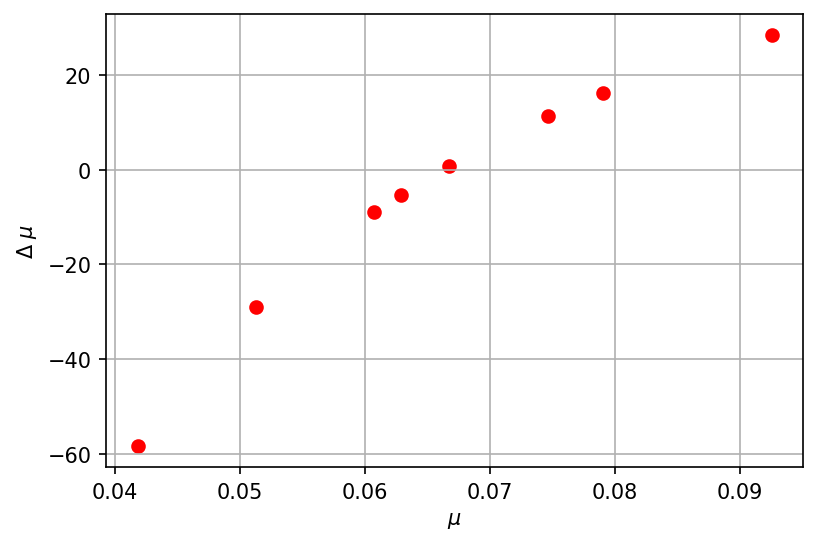

In [156]:
plt.scatter(medias_coeficientes, dev_i_7, c='r')


plt.xlabel('$\mu$')
plt.ylabel('$\Delta$ $\mu$')
plt.grid()
plt.show()

## Por último las imagenes obtenidas con el perfilometro